In [24]:
#importing all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import sqlite3 as sql

In [4]:
pd.read_csv('engine_data.csv')

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [5]:
df = pd.read_csv('engine_data.csv')

In [6]:
df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [7]:
#Looking at the most important headers
df.head(5)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


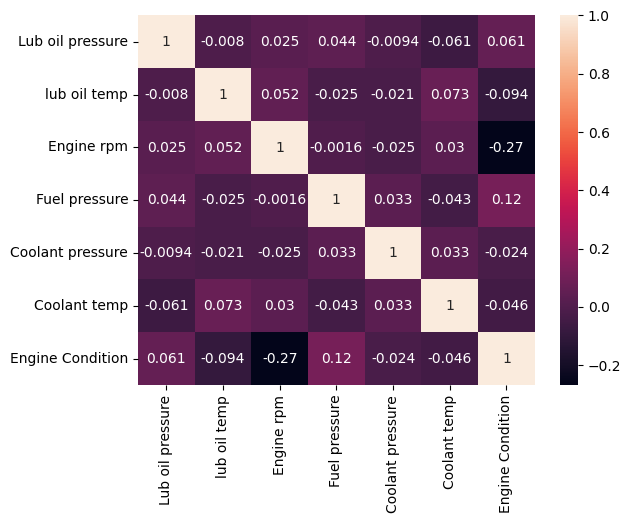

In [9]:
#Correlation heatmap
viz=sns.heatmap(df[['Lub oil pressure','lub oil temp','Engine rpm','Fuel pressure','Coolant pressure','Coolant temp','Engine Condition']].corr(),annot=True)

In [10]:
#Identify the feature X for the outcome Y in the dataframe for building the model
x=sm.add_constant(df['Engine rpm'])
y=df['Coolant pressure']
print(x.shape)
print(y.shape)
x

(19535, 2)
(19535,)


,const,Engine rpm
0,1.0,700
1,1.0,876
2,1.0,520
3,1.0,473
4,1.0,619
...,...,...
19530,1.0,902
19531,1.0,694
19532,1.0,684
19533,1.0,696


In [11]:
#Split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15628, 2)
(3907, 2)
(15628,)
(3907,)


In [12]:
#fitting the model
df=sm.OLS(y_train,x_train).fit()

In [13]:
print(df.params)

const         2.400601
Engine rpm   -0.000085
dtype: float64


In [14]:
df.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.000     
Dependent Variable: Coolant pressure AIC:                45370.1692
Date:               2024-02-06 01:50 BIC:                45385.4828
No. Observations:   15628            Log-Likelihood:     -22683.   
Df Model:           1                F-statistic:        7.500     
Df Residuals:       15626            Prob (F-statistic): 0.00618   
R-squared:          0.000            Scale:              1.0673    
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const            2.4006    0.0258  92.9321  0.0000   2.3500   2.4512
Engine rpm      -0.0001    0.0000  -2.7386  0.0062  -0.0001  -0.0000
-------------------------------------------------------------------
Omnibus:              3646.843      Durbin-Watson:         2.010   
Prob(Omnibus):        0.000         Jarque-Bera (JB):      8672.734
Skew:                 1.304         Prob(JB):              0.000   
Kurtosis:             5.554         Condition No.:         2612    
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [15]:
#predicting values from test data
y_pred_test=df.predict(x_test)
y_pred_train=df.predict(x_train)

In [16]:
#R square for train data
np.abs(r2_score(y_train,y_pred_train))

0.00047972569642151797

In [17]:
#Calculating Root Mean Squared Error
np.sqrt(mean_squared_error(y_train,y_pred_train))

1.0330341035131643

C:\Users\Mujji\AppData\Local\Temp\ipykernel_7660\1519244765.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)


Text(0, 0.5, 'Predicted')

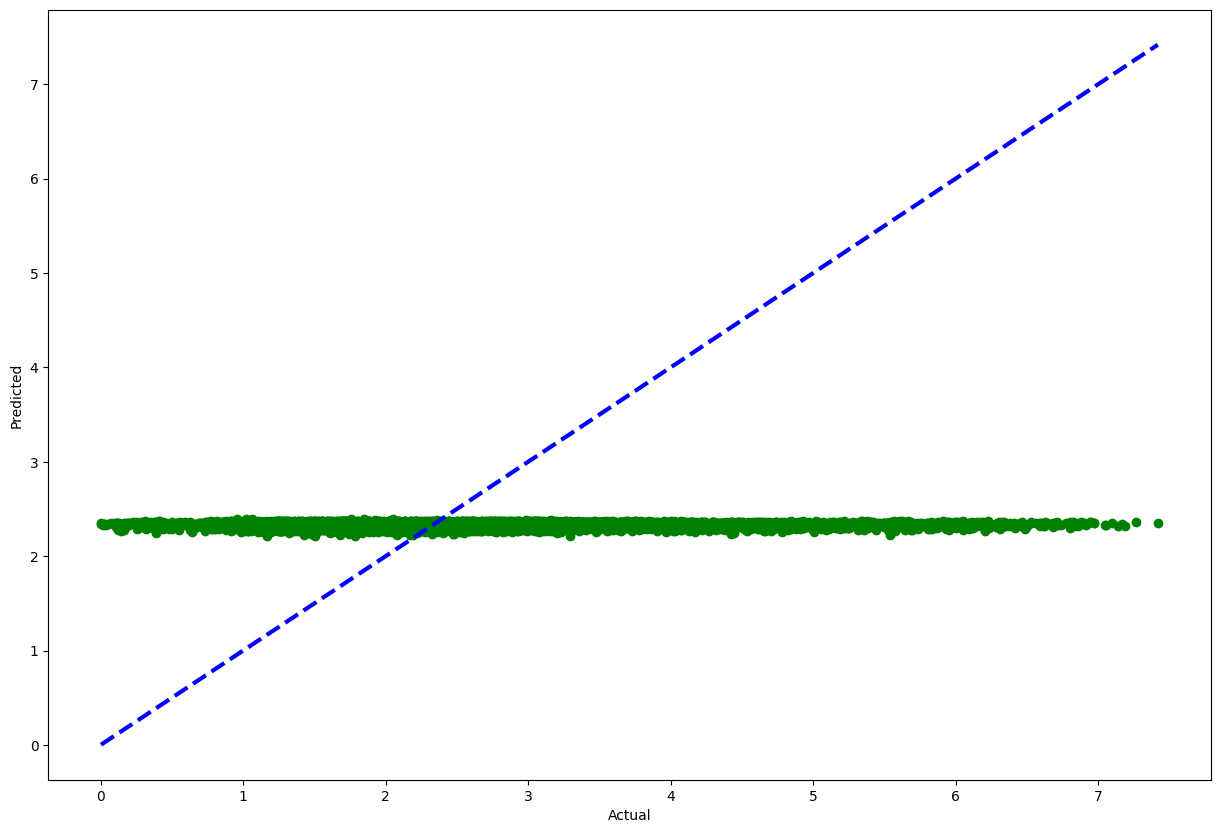

In [18]:
#Scatter plot for train data
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train,c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [19]:
pred_y_df=pd.DataFrame({'engine_data':x_train['Engine rpm'],'Coolant pressure':y_train,'pred_y':y_pred_train})
pred_y_df[0:20]

,engine_data,Coolant pressure,pred_y
13040,937,2.605782,2.321262
15060,526,1.440715,2.356063
17533,703,2.822897,2.341076
2790,668,2.885670,2.344040
10804,665,2.474914,2.344294
12997,1148,1.218411,2.303396
2078,850,3.093109,2.328629
198,1435,2.309843,2.279095
4670,603,3.436049,2.349543
898,1024,0.512182,2.313896
